In [1]:
####### dropout resnet18 vs without dropout
#### 
import torch
import sys
sys.path.append("..")
import numpy as np

CLEAN_PATH = "/home/yifan/dataset/resnet18_with_dropout/pairflip/cifar10/0/"
REF_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"


ENCODER_DIMS=[512,256,256,256,256,2]
DECODER_DIMS= [2,256,256,256,256,512]
VIS_MODEL_NAME = 'vis'

DEVICE='cuda:1'
########## initulize reference data and target data
from alignment.data_preprocess import DataInit
REF_EPOCH = 200
TAR_EPOCH = 200
ref_datainit = DataInit(REF_PATH,REF_PATH,REF_EPOCH)
tar_datainit = DataInit(CLEAN_PATH,CLEAN_PATH,TAR_EPOCH)
ref_model, ref_provider, ref_train_data, ref_prediction, ref_prediction_res, ref_scores = ref_datainit.getData()
tar_model, tar_provider, tar_train_data, tar_prediction, tar_prediction_res, tar_scores = tar_datainit.getData()


from alignment.ReferenceGenerator import ReferenceGenerator
gen = ReferenceGenerator(ref_provider=ref_provider, tar_provider=tar_provider,REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH,ref_model=ref_model,tar_model=tar_model,DEVICE=DEVICE)

absolute_alignment_indicates,predict_label_diff_indicates,predict_confidence_Diff_indicates,high_distance_indicates = gen.subsetClassify(mes_val_for_diff=18,mes_val_for_same=0.8,conf_val_for_diff=0.3,conf_val_for_same=0.05)


from representationTrans.trans_visualizer_border import visualizer
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

I = np.eye(512)
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
vis = visualizer(ref_provider, I,I, np.dot(ref_provider.train_representation(TAR_EPOCH),I), projector, 200,[0,1],'tab10')


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:01<00:00, 190.41it/s]


NET resnet18_with_dropout
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 902.65it/s]


absolute alignment indicates number: 106 label diff indicates number: 12 confidence diff indicates number: 16 high distance number: 97


In [2]:
from AlignVis.aproximate_ref_generator import ApproximateRefGenerator
aeg = ApproximateRefGenerator(ref_provider=ref_provider, tar_provider=tar_provider, REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH, tar_model=tar_model, ref_model=ref_model,DEVICE=DEVICE)

100%|██████████| 250/250 [00:00<00:00, 1543.55it/s]


In [3]:
newRep = aeg.generate_representation_by_cka(predict_label_diff_indicates)


100%|██████████| 1/1 [00:00<00:00, 666.29it/s]


Iteration 162: CKA loss = 0.0000012517
Iteration 162: prediction loss = 44.5222625732
Iteration 162: KNN loss = 0.0000000000
Iteration 162: KNN loss = 2.7435779572


100%|██████████| 1/1 [00:00<00:00, 2805.55it/s]


Iteration 171: CKA loss = 0.0000013113
Iteration 171: prediction loss = 43.7588996887
Iteration 171: KNN loss = 0.0000000000
Iteration 171: KNN loss = 2.7172229290


100%|██████████| 1/1 [00:00<00:00, 3443.60it/s]


Iteration 180: CKA loss = 0.0000012517
Iteration 180: prediction loss = 42.9961318970
Iteration 180: KNN loss = 0.0000000000
Iteration 180: KNN loss = 2.6904046535


100%|██████████| 1/1 [00:00<00:00, 2926.94it/s]


Iteration 189: CKA loss = 0.0000013113
Iteration 189: prediction loss = 42.2354812622
Iteration 189: KNN loss = 0.0000000000
Iteration 189: KNN loss = 2.6634960175


100%|██████████| 1/1 [00:00<00:00, 1944.51it/s]


Iteration 198: CKA loss = 0.0000012517
Iteration 198: prediction loss = 41.4784812927
Iteration 198: KNN loss = 0.0000000000
Iteration 198: KNN loss = 2.6363289356


100%|██████████| 1/1 [00:00<00:00, 309.52it/s]


Iteration 207: CKA loss = 0.0000012517
Iteration 207: prediction loss = 40.7262916565
Iteration 207: KNN loss = 0.0000000000
Iteration 207: KNN loss = 2.6122343540


100%|██████████| 1/1 [00:00<00:00, 4190.11it/s]


Iteration 216: CKA loss = 0.0000012517
Iteration 216: prediction loss = 39.9800224304
Iteration 216: KNN loss = 0.0000000000
Iteration 216: KNN loss = 2.6044020653


100%|██████████| 1/1 [00:00<00:00, 3199.32it/s]


Iteration 225: CKA loss = 0.0000011325
Iteration 225: prediction loss = 39.2406272888
Iteration 225: KNN loss = 0.0000000000
Iteration 225: KNN loss = 2.5965368748


100%|██████████| 1/1 [00:00<00:00, 348.89it/s]


Iteration 234: CKA loss = 0.0000011325
Iteration 234: prediction loss = 38.5089874268
Iteration 234: KNN loss = 0.0000000000
Iteration 234: KNN loss = 2.5886456966


100%|██████████| 1/1 [00:00<00:00, 1639.04it/s]


Iteration 243: CKA loss = 0.0000012517
Iteration 243: prediction loss = 37.7859497070
Iteration 243: KNN loss = 0.0000000000
Iteration 243: KNN loss = 2.5807468891


100%|██████████| 1/1 [00:00<00:00, 3070.50it/s]


Iteration 252: CKA loss = 0.0000010729
Iteration 252: prediction loss = 37.0722389221
Iteration 252: KNN loss = 0.0000000000
Iteration 252: KNN loss = 2.5728464127


100%|██████████| 1/1 [00:00<00:00, 3761.71it/s]


Iteration 261: CKA loss = 0.0000010729
Iteration 261: prediction loss = 36.3685150146
Iteration 261: KNN loss = 0.0000000000
Iteration 261: KNN loss = 2.5649497509


100%|██████████| 1/1 [00:00<00:00, 1391.15it/s]


Iteration 270: CKA loss = 0.0000010729
Iteration 270: prediction loss = 35.6753768921
Iteration 270: KNN loss = 0.0000000000
Iteration 270: KNN loss = 2.5570590496


100%|██████████| 1/1 [00:00<00:00, 3971.88it/s]


Iteration 279: CKA loss = 0.0000009537
Iteration 279: prediction loss = 34.9933471680
Iteration 279: KNN loss = 0.0000000000
Iteration 279: KNN loss = 2.5491826534


100%|██████████| 1/1 [00:00<00:00, 3971.88it/s]


Iteration 288: CKA loss = 0.0000009537
Iteration 288: prediction loss = 34.3229141235
Iteration 288: KNN loss = 0.0000000000
Iteration 288: KNN loss = 2.5413255692


100%|██████████| 1/1 [00:00<00:00, 3194.44it/s]


Iteration 297: CKA loss = 0.0000008941
Iteration 297: prediction loss = 33.6644744873
Iteration 297: KNN loss = 0.0000000000
Iteration 297: KNN loss = 2.5334873199


100%|██████████| 1/1 [00:00<00:00, 4809.98it/s]


Iteration 306: CKA loss = 0.0000008941
Iteration 306: prediction loss = 33.0184173584
Iteration 306: KNN loss = 0.0000000000
Iteration 306: KNN loss = 2.5256755352


100%|██████████| 1/1 [00:00<00:00, 1800.90it/s]


Iteration 315: CKA loss = 0.0000008941
Iteration 315: prediction loss = 32.3850517273
Iteration 315: KNN loss = 0.0000000000
Iteration 315: KNN loss = 2.5208997726


100%|██████████| 1/1 [00:00<00:00, 3120.76it/s]


Iteration 324: CKA loss = 0.0000008941
Iteration 324: prediction loss = 31.7646598816
Iteration 324: KNN loss = 0.0000000000
Iteration 324: KNN loss = 2.5353796482


100%|██████████| 1/1 [00:00<00:00, 2995.93it/s]


Iteration 333: CKA loss = 0.0000008941
Iteration 333: prediction loss = 31.1574783325
Iteration 333: KNN loss = 0.0000000000
Iteration 333: KNN loss = 2.5630164146


100%|██████████| 1/1 [00:00<00:00, 743.28it/s]


Iteration 342: CKA loss = 0.0000007749
Iteration 342: prediction loss = 30.5637073517
Iteration 342: KNN loss = 0.0000000000
Iteration 342: KNN loss = 2.5906741619


100%|██████████| 1/1 [00:00<00:00, 4495.50it/s]


Iteration 351: CKA loss = 0.0000007749
Iteration 351: prediction loss = 29.9835033417
Iteration 351: KNN loss = 0.0000000000
Iteration 351: KNN loss = 2.6183388233


100%|██████████| 1/1 [00:00<00:00, 643.10it/s]


Iteration 360: CKA loss = 0.0000007749
Iteration 360: prediction loss = 29.4170074463
Iteration 360: KNN loss = 0.0000000000
Iteration 360: KNN loss = 2.6540274620


100%|██████████| 1/1 [00:00<00:00, 4452.55it/s]


Iteration 369: CKA loss = 0.0000007153
Iteration 369: prediction loss = 28.8643150330
Iteration 369: KNN loss = 0.0000000000
Iteration 369: KNN loss = 2.7041423321


100%|██████████| 1/1 [00:00<00:00, 3669.56it/s]


Iteration 378: CKA loss = 0.0000007749
Iteration 378: prediction loss = 28.3255004883
Iteration 378: KNN loss = 0.0000000000
Iteration 378: KNN loss = 2.7543008327


100%|██████████| 1/1 [00:00<00:00, 3666.35it/s]


Iteration 387: CKA loss = 0.0000007153
Iteration 387: prediction loss = 27.8006076813
Iteration 387: KNN loss = 0.0000000000
Iteration 387: KNN loss = 2.8044803143


100%|██████████| 1/1 [00:00<00:00, 595.36it/s]


Iteration 396: CKA loss = 0.0000007153
Iteration 396: prediction loss = 27.2896595001
Iteration 396: KNN loss = 0.0000000000
Iteration 396: KNN loss = 2.8546574116


100%|██████████| 1/1 [00:00<00:00, 2716.52it/s]


Iteration 405: CKA loss = 0.0000007153
Iteration 405: prediction loss = 26.7926635742
Iteration 405: KNN loss = 0.0000000000
Iteration 405: KNN loss = 2.9048089981


100%|██████████| 1/1 [00:00<00:00, 3833.92it/s]


Iteration 414: CKA loss = 0.0000005960
Iteration 414: prediction loss = 26.3095855713
Iteration 414: KNN loss = 0.0000000000
Iteration 414: KNN loss = 2.9549148083


100%|██████████| 1/1 [00:00<00:00, 645.58it/s]


Iteration 423: CKA loss = 0.0000005960
Iteration 423: prediction loss = 25.8403892517
Iteration 423: KNN loss = 0.0000000000
Iteration 423: KNN loss = 3.0049560070


100%|██████████| 1/1 [00:00<00:00, 667.14it/s]


Iteration 432: CKA loss = 0.0000005364
Iteration 432: prediction loss = 25.3850212097
Iteration 432: KNN loss = 0.0000000000
Iteration 432: KNN loss = 3.0549128056


100%|██████████| 1/1 [00:00<00:00, 420.44it/s]


Iteration 441: CKA loss = 0.0000005960
Iteration 441: prediction loss = 24.9433937073
Iteration 441: KNN loss = 0.0000000000
Iteration 441: KNN loss = 3.1047623158


100%|██████████| 1/1 [00:00<00:00, 4401.16it/s]


Iteration 450: CKA loss = 0.0000005364
Iteration 450: prediction loss = 24.5154304504
Iteration 450: KNN loss = 0.0000000000
Iteration 450: KNN loss = 3.1544904709


100%|██████████| 1/1 [00:00<00:00, 715.51it/s]


Iteration 459: CKA loss = 0.0000005960
Iteration 459: prediction loss = 24.1010169983
Iteration 459: KNN loss = 0.0000000000
Iteration 459: KNN loss = 3.2040779591


100%|██████████| 1/1 [00:00<00:00, 1532.45it/s]


Iteration 468: CKA loss = 0.0000005364
Iteration 468: prediction loss = 23.7000427246
Iteration 468: KNN loss = 0.0000000000
Iteration 468: KNN loss = 3.2535085678


100%|██████████| 1/1 [00:00<00:00, 876.74it/s]


Iteration 477: CKA loss = 0.0000004172
Iteration 477: prediction loss = 23.3123722076
Iteration 477: KNN loss = 0.0000000000
Iteration 477: KNN loss = 3.3027684689


100%|██████████| 1/1 [00:00<00:00, 3979.42it/s]


Iteration 486: CKA loss = 0.0000004172
Iteration 486: prediction loss = 22.9378662109
Iteration 486: KNN loss = 0.0000000000
Iteration 486: KNN loss = 3.3518390656


100%|██████████| 1/1 [00:00<00:00, 3421.13it/s]


Iteration 495: CKA loss = 0.0000004172
Iteration 495: prediction loss = 22.5763854980
Iteration 495: KNN loss = 0.0000000000
Iteration 495: KNN loss = 3.4007079601


100%|██████████| 1/1 [00:00<00:00, 4249.55it/s]


Iteration 504: CKA loss = 0.0000004172
Iteration 504: prediction loss = 22.2277526855
Iteration 504: KNN loss = 0.0000000000
Iteration 504: KNN loss = 3.4493567944


100%|██████████| 1/1 [00:00<00:00, 372.99it/s]


Iteration 513: CKA loss = 0.0000003576
Iteration 513: prediction loss = 21.8918151855
Iteration 513: KNN loss = 0.0000000000
Iteration 513: KNN loss = 3.4977757931


100%|██████████| 1/1 [00:00<00:00, 2886.65it/s]


Iteration 522: CKA loss = 0.0000002384
Iteration 522: prediction loss = 21.5683879852
Iteration 522: KNN loss = 0.0000000000
Iteration 522: KNN loss = 3.5459499359


100%|██████████| 1/1 [00:00<00:00, 654.13it/s]


Iteration 531: CKA loss = 0.0000003576
Iteration 531: prediction loss = 21.2572975159
Iteration 531: KNN loss = 0.0000000000
Iteration 531: KNN loss = 3.5923950672


100%|██████████| 1/1 [00:00<00:00, 882.64it/s]


Iteration 540: CKA loss = 0.0000003576
Iteration 540: prediction loss = 20.9583549500
Iteration 540: KNN loss = 0.0000000000
Iteration 540: KNN loss = 3.6380825043


100%|██████████| 1/1 [00:00<00:00, 2631.31it/s]


Iteration 549: CKA loss = 0.0000003576
Iteration 549: prediction loss = 20.6713714600
Iteration 549: KNN loss = 0.0000000000
Iteration 549: KNN loss = 3.6835310459


100%|██████████| 1/1 [00:00<00:00, 259.82it/s]


Iteration 558: CKA loss = 0.0000003576
Iteration 558: prediction loss = 20.3961486816
Iteration 558: KNN loss = 0.0000000000
Iteration 558: KNN loss = 3.7287299633


100%|██████████| 1/1 [00:00<00:00, 4156.89it/s]


Iteration 567: CKA loss = 0.0000003576
Iteration 567: prediction loss = 20.1324825287
Iteration 567: KNN loss = 0.0000000000
Iteration 567: KNN loss = 3.7736711502


100%|██████████| 1/1 [00:00<00:00, 3748.26it/s]


Iteration 576: CKA loss = 0.0000002384
Iteration 576: prediction loss = 19.8801689148
Iteration 576: KNN loss = 0.0000000000
Iteration 576: KNN loss = 3.8183438778


100%|██████████| 1/1 [00:00<00:00, 3113.81it/s]


Iteration 585: CKA loss = 0.0000002384
Iteration 585: prediction loss = 19.6390037537
Iteration 585: KNN loss = 0.0000000000
Iteration 585: KNN loss = 3.8627402782


100%|██████████| 1/1 [00:00<00:00, 4236.67it/s]


Iteration 594: CKA loss = 0.0000002384
Iteration 594: prediction loss = 19.4087715149
Iteration 594: KNN loss = 0.0000000000
Iteration 594: KNN loss = 3.9068500996


100%|██████████| 1/1 [00:00<00:00, 441.23it/s]


Iteration 603: CKA loss = 0.0000002384
Iteration 603: prediction loss = 19.1892642975
Iteration 603: KNN loss = 0.0000000000
Iteration 603: KNN loss = 3.9506657124


100%|██████████| 1/1 [00:00<00:00, 761.91it/s]


Iteration 612: CKA loss = 0.0000001788
Iteration 612: prediction loss = 18.9802742004
Iteration 612: KNN loss = 0.0000000000
Iteration 612: KNN loss = 3.9941825867


100%|██████████| 1/1 [00:00<00:00, 3466.37it/s]


Iteration 621: CKA loss = 0.0000002384
Iteration 621: prediction loss = 18.7815780640
Iteration 621: KNN loss = 0.0000000000
Iteration 621: KNN loss = 4.0373921394


100%|██████████| 1/1 [00:00<00:00, 703.27it/s]


Iteration 630: CKA loss = 0.0000002384
Iteration 630: prediction loss = 18.5929565430
Iteration 630: KNN loss = 0.0000000000
Iteration 630: KNN loss = 4.0802831650


100%|██████████| 1/1 [00:00<00:00, 485.85it/s]


Iteration 639: CKA loss = 0.0000002384
Iteration 639: prediction loss = 18.4142036438
Iteration 639: KNN loss = 0.0000000000
Iteration 639: KNN loss = 4.1228547096


100%|██████████| 1/1 [00:00<00:00, 613.29it/s]


Iteration 648: CKA loss = 0.0000002384
Iteration 648: prediction loss = 18.2450981140
Iteration 648: KNN loss = 0.0000000000
Iteration 648: KNN loss = 4.1651005745


100%|██████████| 1/1 [00:00<00:00, 782.23it/s]


Iteration 657: CKA loss = 0.0000001788
Iteration 657: prediction loss = 18.0854225159
Iteration 657: KNN loss = 0.0000000000
Iteration 657: KNN loss = 4.2070145607


100%|██████████| 1/1 [00:00<00:00, 3302.60it/s]


Iteration 666: CKA loss = 0.0000001788
Iteration 666: prediction loss = 17.9349613190
Iteration 666: KNN loss = 0.0000000000
Iteration 666: KNN loss = 4.2485904694


100%|██████████| 1/1 [00:00<00:00, 4315.13it/s]


Iteration 675: CKA loss = 0.0000001788
Iteration 675: prediction loss = 17.7934951782
Iteration 675: KNN loss = 0.0000000000
Iteration 675: KNN loss = 4.2898240089


100%|██████████| 1/1 [00:00<00:00, 496.37it/s]


Iteration 684: CKA loss = 0.0000001788
Iteration 684: prediction loss = 17.6608028412
Iteration 684: KNN loss = 0.0000000000
Iteration 684: KNN loss = 4.3307113647


100%|██████████| 1/1 [00:00<00:00, 476.95it/s]


Iteration 693: CKA loss = 0.0000001788
Iteration 693: prediction loss = 17.5366840363
Iteration 693: KNN loss = 0.0000000000
Iteration 693: KNN loss = 4.3722467422


100%|██████████| 1/1 [00:00<00:00, 928.77it/s]


Iteration 702: CKA loss = 0.0000001788
Iteration 702: prediction loss = 17.4209213257
Iteration 702: KNN loss = 0.0000000000
Iteration 702: KNN loss = 4.4256777763


100%|██████████| 1/1 [00:00<00:00, 670.98it/s]


Iteration 711: CKA loss = 0.0000001788
Iteration 711: prediction loss = 17.3132991791
Iteration 711: KNN loss = 0.0000000000
Iteration 711: KNN loss = 4.4786553383


100%|██████████| 1/1 [00:00<00:00, 3512.82it/s]


Iteration 720: CKA loss = 0.0000002384
Iteration 720: prediction loss = 17.2136116028
Iteration 720: KNN loss = 0.0000000000
Iteration 720: KNN loss = 4.5311779976


100%|██████████| 1/1 [00:00<00:00, 3656.76it/s]


Iteration 729: CKA loss = 0.0000001788
Iteration 729: prediction loss = 17.1216506958
Iteration 729: KNN loss = 0.0000000000
Iteration 729: KNN loss = 4.5832438469


100%|██████████| 1/1 [00:00<00:00, 751.67it/s]


Iteration 738: CKA loss = 0.0000001788
Iteration 738: prediction loss = 17.0372047424
Iteration 738: KNN loss = 0.0000000000
Iteration 738: KNN loss = 4.6348509789


100%|██████████| 1/1 [00:00<00:00, 895.26it/s]


Iteration 747: CKA loss = 0.0000000596
Iteration 747: prediction loss = 16.9600772858
Iteration 747: KNN loss = 0.0000000000
Iteration 747: KNN loss = 4.6859970093


100%|██████████| 1/1 [00:00<00:00, 3600.26it/s]


Iteration 756: CKA loss = 0.0000001788
Iteration 756: prediction loss = 16.8900680542
Iteration 756: KNN loss = 0.0000000000
Iteration 756: KNN loss = 4.7366805077


100%|██████████| 1/1 [00:00<00:00, 323.56it/s]


Iteration 765: CKA loss = 0.0000000596
Iteration 765: prediction loss = 16.8269767761
Iteration 765: KNN loss = 0.0000000000
Iteration 765: KNN loss = 4.7869009972


100%|██████████| 1/1 [00:00<00:00, 393.79it/s]


Iteration 774: CKA loss = 0.0000000596
Iteration 774: prediction loss = 16.7706089020
Iteration 774: KNN loss = 0.0000000000
Iteration 774: KNN loss = 4.8366580009


100%|██████████| 1/1 [00:00<00:00, 745.79it/s]


Iteration 783: CKA loss = 0.0000000596
Iteration 783: prediction loss = 16.7207775116
Iteration 783: KNN loss = 0.0000000000
Iteration 783: KNN loss = 4.8859500885


100%|██████████| 1/1 [00:00<00:00, 2931.03it/s]


Iteration 792: CKA loss = 0.0000000596
Iteration 792: prediction loss = 16.6772766113
Iteration 792: KNN loss = 0.0000000000
Iteration 792: KNN loss = 4.9452795982


100%|██████████| 1/1 [00:00<00:00, 1147.55it/s]


Iteration 801: CKA loss = 0.0000000596
Iteration 801: prediction loss = 16.6399154663
Iteration 801: KNN loss = 0.0000000000
Iteration 801: KNN loss = 5.0164608955


100%|██████████| 1/1 [00:00<00:00, 430.01it/s]


Iteration 810: CKA loss = 0.0000000596
Iteration 810: prediction loss = 16.6085109711
Iteration 810: KNN loss = 0.0000000000
Iteration 810: KNN loss = 5.0869984627


100%|██████████| 1/1 [00:00<00:00, 2730.67it/s]


Iteration 819: CKA loss = 0.0000001788
Iteration 819: prediction loss = 16.5828857422
Iteration 819: KNN loss = 0.0000000000
Iteration 819: KNN loss = 5.1568942070


100%|██████████| 1/1 [00:00<00:00, 2563.76it/s]


Iteration 828: CKA loss = 0.0000001788
Iteration 828: prediction loss = 16.5628662109
Iteration 828: KNN loss = 0.0000000000
Iteration 828: KNN loss = 5.2261490822


100%|██████████| 1/1 [00:00<00:00, 2139.95it/s]


Iteration 837: CKA loss = 0.0000001788
Iteration 837: prediction loss = 16.5482730865
Iteration 837: KNN loss = 0.0000000000
Iteration 837: KNN loss = 5.2947659492


100%|██████████| 1/1 [00:00<00:00, 4116.10it/s]


Iteration 846: CKA loss = 0.0000001788
Iteration 846: prediction loss = 16.5389328003
Iteration 846: KNN loss = 0.0000000000
Iteration 846: KNN loss = 5.3627457619


100%|██████████| 1/1 [00:00<00:00, 2981.03it/s]


Iteration 855: CKA loss = 0.0000000596
Iteration 855: prediction loss = 16.5346813202
Iteration 855: KNN loss = 0.0000000000
Iteration 855: KNN loss = 5.4300880432


100%|██████████| 1/1 [00:00<00:00, 743.54it/s]


Iteration 864: CKA loss = 0.0000000596
Iteration 864: prediction loss = 16.5353507996
Iteration 864: KNN loss = 0.0000000000
Iteration 864: KNN loss = 5.4967975616


100%|██████████| 1/1 [00:00<00:00, 4124.19it/s]


Iteration 873: CKA loss = 0.0000000596
Iteration 873: prediction loss = 16.5407752991
Iteration 873: KNN loss = 0.0000000000
Iteration 873: KNN loss = 5.5628743172


100%|██████████| 1/1 [00:00<00:00, 830.72it/s]


Iteration 882: CKA loss = 0.0000000596
Iteration 882: prediction loss = 16.5507888794
Iteration 882: KNN loss = 0.0000000000
Iteration 882: KNN loss = 5.6283202171


100%|██████████| 1/1 [00:00<00:00, 2636.27it/s]


Iteration 891: CKA loss = 0.0000000596
Iteration 891: prediction loss = 16.5652313232
Iteration 891: KNN loss = 0.0000000000
Iteration 891: KNN loss = 5.6921677589


100%|██████████| 1/1 [00:00<00:00, 2995.93it/s]


Iteration 900: CKA loss = 0.0000000000
Iteration 900: prediction loss = 16.5839481354
Iteration 900: KNN loss = 0.0000000000
Iteration 900: KNN loss = 5.7542629242


100%|██████████| 1/1 [00:00<00:00, 3701.95it/s]


Iteration 909: CKA loss = 0.0000001788
Iteration 909: prediction loss = 16.6067962646
Iteration 909: KNN loss = 0.0000000000
Iteration 909: KNN loss = 5.8157668114


100%|██████████| 1/1 [00:00<00:00, 3979.42it/s]


Iteration 918: CKA loss = 0.0000001788
Iteration 918: prediction loss = 16.6336212158
Iteration 918: KNN loss = 0.0000000000
Iteration 918: KNN loss = 5.8757090569


100%|██████████| 1/1 [00:00<00:00, 2248.96it/s]


Iteration 927: CKA loss = 0.0000001788
Iteration 927: prediction loss = 16.6642913818
Iteration 927: KNN loss = 0.0000000000
Iteration 927: KNN loss = 5.9332237244


100%|██████████| 1/1 [00:00<00:00, 355.87it/s]


Iteration 936: CKA loss = 0.0000000596
Iteration 936: prediction loss = 16.6986675262
Iteration 936: KNN loss = 0.0000000000
Iteration 936: KNN loss = 5.9901909828


100%|██████████| 1/1 [00:00<00:00, 699.52it/s]


Iteration 945: CKA loss = 0.0000000596
Iteration 945: prediction loss = 16.7366008759
Iteration 945: KNN loss = 0.0000000000
Iteration 945: KNN loss = 6.0466079712


100%|██████████| 1/1 [00:00<00:00, 4136.39it/s]


Iteration 954: CKA loss = 0.0000000596
Iteration 954: prediction loss = 16.7779541016
Iteration 954: KNN loss = 0.0000000000
Iteration 954: KNN loss = 6.1024761200


100%|██████████| 1/1 [00:00<00:00, 386.29it/s]


Iteration 963: CKA loss = 0.0000000596
Iteration 963: prediction loss = 16.8225975037
Iteration 963: KNN loss = 0.0000000000
Iteration 963: KNN loss = 6.1577963829


100%|██████████| 1/1 [00:00<00:00, 763.99it/s]


Iteration 972: CKA loss = 0.0000000000
Iteration 972: prediction loss = 16.8704109192
Iteration 972: KNN loss = 0.0000000000
Iteration 972: KNN loss = 6.2125754356


100%|██████████| 1/1 [00:00<00:00, 402.87it/s]


Iteration 981: CKA loss = 0.0000000596
Iteration 981: prediction loss = 16.9212760925
Iteration 981: KNN loss = 0.0000000000
Iteration 981: KNN loss = 6.2668132782


100%|██████████| 1/1 [00:00<00:00, 560.89it/s]


Iteration 990: CKA loss = 0.0000000596
Iteration 990: prediction loss = 16.9750652313
Iteration 990: KNN loss = 0.0000000000
Iteration 990: KNN loss = 6.3205108643


100%|██████████| 1/1 [00:00<00:00, 452.70it/s]

Iteration 999: CKA loss = 0.0000000000
Iteration 999: prediction loss = 17.0316619873
Iteration 999: KNN loss = 0.0000000000
Iteration 999: KNN loss = 6.3736758232


In [ ]:
from CKA_utils.CKA import CKA, CudaCKA
np_cka = CKA()

print('CKA between absolute alignmnet subset is:',np_cka.kernel_CKA(newRep,tar_train_data[predict_label_diff_indicates]))

CKA between absolute alignmnet subset is: 0.998171496567099


In [5]:
from CKA_utils.CKA import CKA, CudaCKA
np_cka = CKA()

print('CKA between absolute alignmnet subset is:',np_cka.kernel_CKA(newRep,ref_train_data[predict_label_diff_indicates]))

CKA between absolute alignmnet subset is: 0.8476445588554957


In [6]:
print('reference predict res: ', ref_prediction_res[predict_label_diff_indicates])
print('adjusetd ref  predict res: ', ref_provider.get_pred(200, newRep).argmax(axis=1))
print('adjusetd ref  predict res: ', tar_provider.get_pred(200, newRep).argmax(axis=1))
print('target        predict res: ', tar_prediction_res[predict_label_diff_indicates])

reference predict res:  [2 3 4 0 3 5 3 3 3 5 5 5]


100%|██████████| 1/1 [00:00<00:00, 2947.51it/s]


adjusetd ref  predict res:  [3 3 5 3 3 5 2 3 3 5 4 3]


100%|██████████| 1/1 [00:00<00:00, 2798.07it/s]

adjusetd ref  predict res:  [5 5 5 3 5 3 9 5 5 3 5 3]
target        predict res:  [5 5 5 3 5 3 9 5 5 3 7 3]


In [6]:
print('reference predict res: ', ref_prediction_res[predict_label_diff_indicates])
print('adjusetd ref  predict res: ', ref_provider.get_pred(200, newRep).argmax(axis=1))
print('adjusetd ref  predict res: ', tar_provider.get_pred(200, newRep).argmax(axis=1))
print('target        predict res: ', tar_prediction_res[predict_label_diff_indicates])

reference predict res:  [2 3 4 0 3 5 3 3 3 5 5 5]


100%|██████████| 1/1 [00:00<00:00, 2399.49it/s]


adjusetd ref  predict res:  [3 3 5 3 3 5 2 3 3 5 4 3]


100%|██████████| 1/1 [00:00<00:00, 2309.64it/s]

adjusetd ref  predict res:  [5 5 5 3 5 3 9 5 5 3 5 3]
target        predict res:  [5 5 5 3 5 3 9 5 5 3 7 3]


In [3]:
X = ref_train_data
Y = tar_train_data

In [8]:
from AlignVis.alignment_metrix_generator import TrainingSnapshotAlignment
alignment_n = TrainingSnapshotAlignment(ref_provider, tar_provider,ref_EPOCH=REF_EPOCH,tar_EPOCH=TAR_EPOCH, projector=projector, visualizer=vis)
R_n = alignment_n.align_embeddings_batch(Y,X,train_steps=18000,CKA_LAMBDA=100,CKA_LAMBAD_FOR_INIT=1e-18,N_LAMBDA=100)

batch_idx 0,iteration 0, loss1 65502392.0 loss2 {tensor(0.7832, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.8510, requires_grad=True)}
batch_idx 99,iteration 99, loss1 4598.240234375 loss2 {tensor(0.5457, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.6430, requires_grad=True)}
batch_idx 198,iteration 198, loss1 663.187744140625 loss2 {tensor(0.5355, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.5480, requires_grad=True)}
batch_idx 297,iteration 297, loss1 304.55419921875 loss2 {tensor(0.4401, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4520, requires_grad=True)}
batch_idx 396,iteration 396, loss1 237.3682098388672 loss2 {tensor(0.3747, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4440, requires_grad=True)}
batch_idx 495,iteration 495, loss1 244.52133178710938 loss2 {tensor(0.3433, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.3960, requires_grad=True)}
batch_idx 94,iteration 594, loss1 281.8914794921875 loss2 {tensor(0.3868, grad_fn=<AddBackward0>)} neibour_loss {tenso

In [ ]:
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
tar_projector= TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")


In [5]:
X = ref_train_data
Y = tar_train_data

S_n = alignment_n.align_embeddings_batch(X=np.dot(tar_train_data, R_n.detach().numpy()),Y=Y,train_steps=500,CKA_LAMBDA=100,CKA_LAMBAD_FOR_INIT=1e-18,N_LAMBDA=100)

batch_idx 0,iteration 0, loss1 93999576.0 loss2 {tensor(0.9029, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.8810, requires_grad=True)}
batch_idx 99,iteration 99, loss1 1322.1348876953125 loss2 {tensor(0.5665, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.5620, requires_grad=True)}
batch_idx 198,iteration 198, loss1 219.8341064453125 loss2 {tensor(0.4174, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4110, requires_grad=True)}
batch_idx 297,iteration 297, loss1 167.7288055419922 loss2 {tensor(0.3267, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.3400, requires_grad=True)}
batch_idx 396,iteration 396, loss1 120.37248992919922 loss2 {tensor(0.2442, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.3160, requires_grad=True)}
batch_idx 495,iteration 495, loss1 144.3109588623047 loss2 {tensor(0.2652, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.3240, requires_grad=True)}


Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 8293.40it/s]


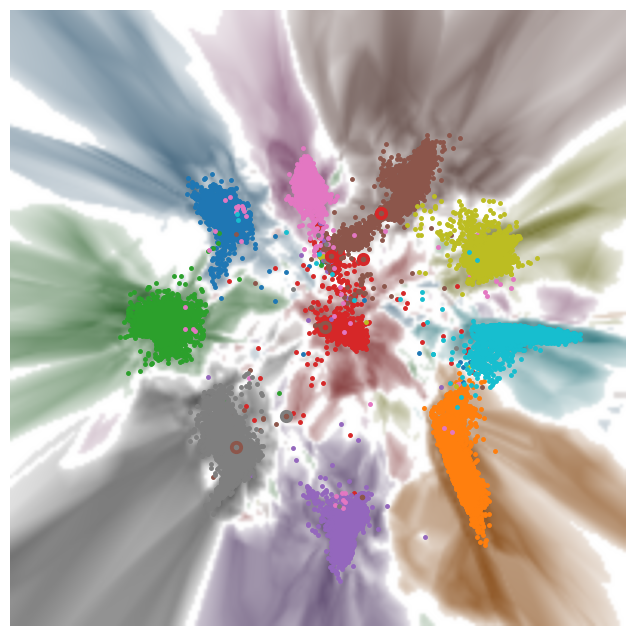

In [6]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, S_n.detach().numpy(),I, np.dot(tar_train_data,R_n.detach().numpy()), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 7379.09it/s]


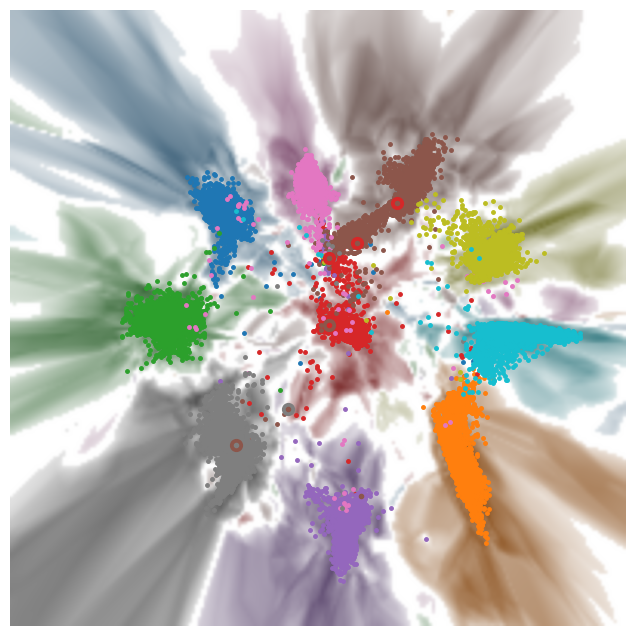

In [26]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, S_n.detach().numpy(),I, np.dot(tar_train_data,R_n.detach().numpy()), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 6037.51it/s]


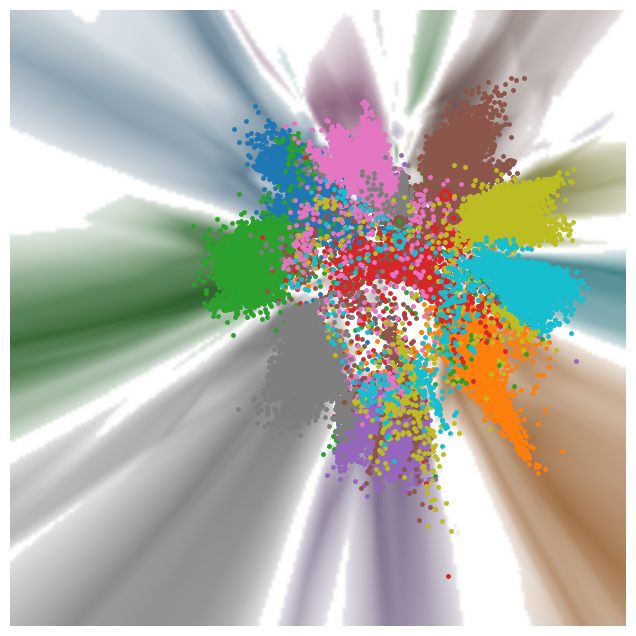

In [80]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=CLEAN_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from representationTrans.trans_visualizer_border import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(ref_provider, R_n.detach().numpy(),I, np.dot(ref_train_data,S_n.detach().numpy()), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))